# Contents Library

1. Downloading Data
2. Conducting Exploratory Data Analysis (EDA)
3. Building a Model to Predict User Churn
4. Creating User Clusters
5. Formulating Conclusions and Simple Recommendations for Working with Customers

# Project Description

Fitness franchise named **Model Fitness** is developing a **customer engagement strategy based on analytical data**. One of the common challenges faced by fitness centers and other services is **customer churn**—determining when a customer has stopped using the service. Calculating churn rates based on account deletions or subscription non-renewals is one way, but sometimes, you can't be certain if a client has truly left without your knowledge.

Churn indicators can vary between different industries. For a fitness center, a customer might be considered gone if they haven't returned for a month. However, this might not always be accurate; a customer could be on vacation and plan to return afterward. Yet, cases like these are rare. Typically, if a customer joins, attends a few times, then disappears, they are unlikely to return.

For a fitness business, customers are considered gone if they don't return for a month. However, this may not be entirely accurate. A customer might not visit the fitness center for a month because they are on vacation, for example, in Bali, and plan to return to the fitness center after their vacation. However, such cases are rare. Typically, if a customer decides to join, attends a few times, and then disappears, there's a high likelihood that the customer won't return.

**To reduce churn rates, Model Fitness has digitized several customer profiles. Your task is to analyze these customer profiles and develop a customer retention strategy.**

# Project Goals

- Understand the Behavior of Model Fitness Customers
- Identify Features Influencing Model Fitness Customer Behavior
- Discover Potential Clusters that Could Reduce Customer Churn
- Find Profiles Suitable for Model Fitness Customers

# Work Sequence

Steps to be taken:

1. Data to be downloaded: '/datasets/gym_churn_us.csv'
2. Pre-processing (data checking and type verification, if any changes are needed)
3. Continue Exploratory Data Analysis
4. Determine the Model to be used for prediction
5. Train the designated Model
6. Choose features that align with our goals
7. Analyze the distribution of feature results
8. Draw conclusions from the analysis

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

## Import Data

Let's see what the dataset we have looks like.

In [2]:
df = pd.read_csv('/datasets/gym_churn_us.csv')
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


we got 4000 rows with 14 columns

##  Conducting Exploratory Data Analysis (EDA)

We will check if there are any missing features and learn the mean and standard deviation values. We also need to look at the dataset information.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


From the dataset information, we can see that so far, there is no missing data, and there are no issues with the data types.

For the descriptive information, we can observe that the average values in the dataset tend to be 0 or 1. For example, the gender is more dominant with 0 or 1. For gender, it seems more dominant with 1 because it is more than 0.5, and this applies to features with values of 1 or 0. However, some features are not explained in detail, such as what 0 and 1 represent in gender. It needs to be clarified what 0 and 1 actually mean. Let's take a closer look at the data.

In [5]:
df_mean_churn = df.groupby('Churn').agg('mean')
df_mean_churn

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [6]:
df['Churn'].value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

From the grouping results above, some features have the same average, meaning that the comparison between 0 and 1 for both groups does not differ much. For example, gender has an average of 0.51 for both groups, indicating that the proportion of 0 and 1 for customers who stay or leave does not differ significantly. Features like phone have an average of 0.90, which doesn't differ much for customers who stay and leave, meaning that many provide phone numbers, whether customers stay or leave. However, for binary values, it is somewhat challenging to analyze and requires further investigation, as seen in Age, Contract_period, etc., which are non-binary values.

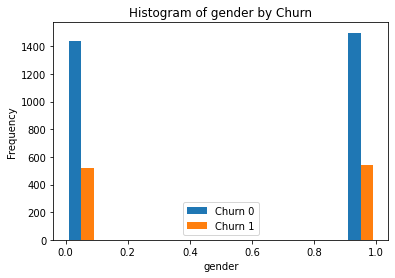

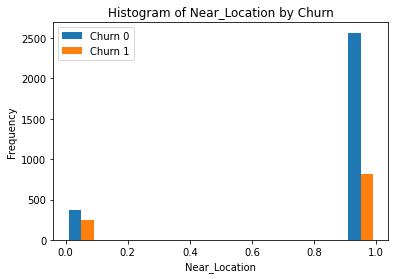

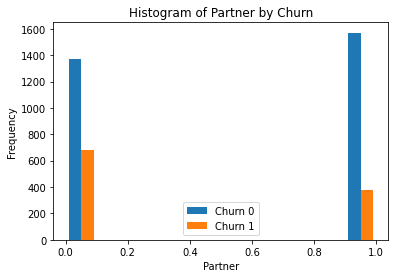

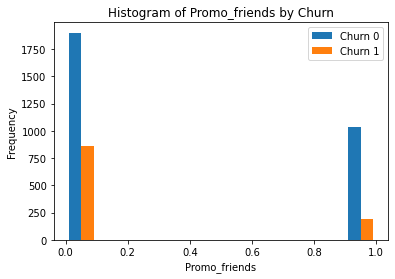

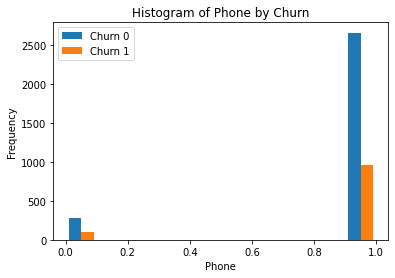

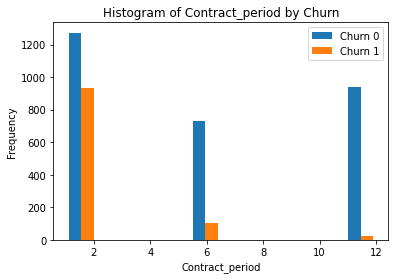

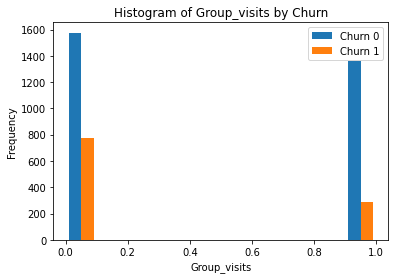

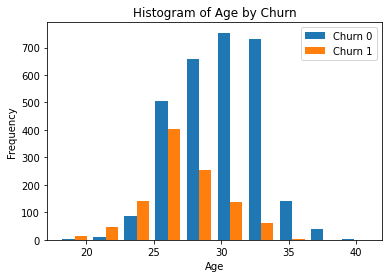

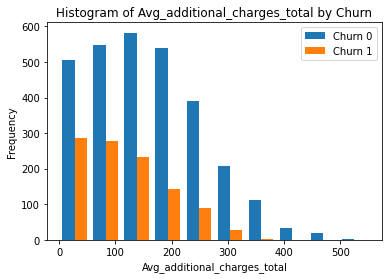

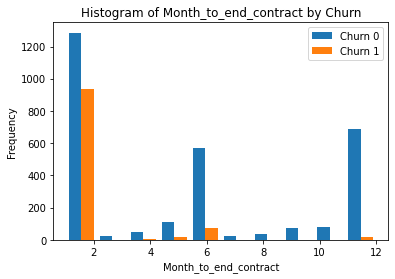

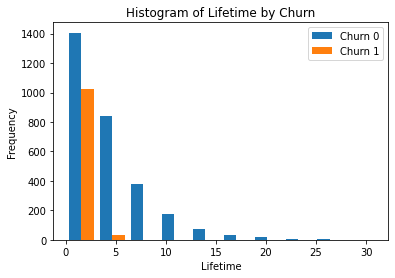

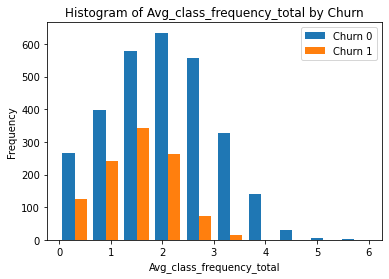

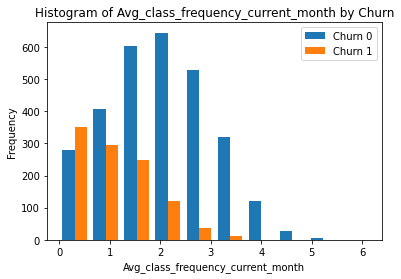

In [7]:
features = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period',
            'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract',
            'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']


for feature in features:
    churn_0 = df[df['Churn'] == 0][feature]
    churn_1 = df[df['Churn'] == 1][feature]

    plt.hist([churn_0, churn_1], bins=10, label=['Churn 0', 'Churn 1'])
    plt.title(f"Histogram of {feature} by Churn")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

If we look at the histogram results of churn against the features in the dataset, there are interesting features that can be concluded from this graph, such as contract period, age, weekly attendance, and lifetime. For example, age 25-35. The older the age, the smaller the churn. Also, more frequent visits to the gym during the week result in less churn.

In [8]:
df.corr()['Churn'].sort_values()

Lifetime                            -0.438220
Avg_class_frequency_current_month   -0.412348
Age                                 -0.404735
Contract_period                     -0.389984
Month_to_end_contract               -0.381393
Avg_class_frequency_total           -0.249715
Avg_additional_charges_total        -0.198697
Group_visits                        -0.175325
Promo_friends                       -0.162233
Partner                             -0.157986
Near_Location                       -0.128098
Phone                               -0.001177
gender                               0.000708
Churn                                1.000000
Name: Churn, dtype: float64

From the correlation results with the churn feature, the following features exhibit strong negative correlations, indicating that as the values of these features increase, the frequency of churn decreases:

- 'Lifetime' — the time (in months) since the customer's first visit to the fitness center.
- 'Avg_class_frequency_current_month' — the average frequency of visits per week throughout the current month.
- 'Age'

## Building a Model to Predict User Churn

In building the model, we need to provide information on the target variable and feature variables. Then, we separate the data into two parts, the test and train parts, using an 80/20 proportion

In [9]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

It's time to train the model on the training set using two methods: logistic regression and random forest.

In [11]:
model = LogisticRegression()

model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions) ))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.92
Precision: 0.87
Recall: 0.81


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For the logistic regression model, we observe an accuracy of 0.92, indicating sufficient accuracy. The precision value of 0.87 is also quite good, as precision informs us about the accuracy of predictions. Additionally, the recall value, which minimizes the opposite risk, is above 0.8. The model seems satisfactory.

In [12]:
model_RFR = RandomForestRegressor(random_state = 0)

model_RFR.fit(X_train, y_train)
predictions = model_RFR.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, predictions)

print('Mean: {:.2f}'.format(y_test.mean()))
print('Mean Absolute Error (MAE): {:.2f}'.format(mae))
print('Mean Squared Error (MSE): {:.2f}'.format(mse))
print('Root Mean Squared Error (RMSE): {:.2f}'.format(rmse))
print('R-squared (R^2): {:.2f}'.format(r2))

Mean: 0.25
Mean Absolute Error (MAE): 0.12
Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.24
R-squared (R^2): 0.70


Looking at the results of MAE, MSE, and RMSE, they are smaller than the average, suggesting that the model we built is quite accurate. For R-squared, the closer it is to 1, the more accurate our predictions are. However, there is still room for improvement in R-squared.

**From the results of the two models, both produce good data. Still, for the random forest regressor, the R-squared result is not considered excellent. Therefore, between the two models, it is better to use logistic regression.**

## Creating User Clusters

Now, it's time to select the column containing churn data and define the object clusters (users).

First, we need to standardize the data, and then we can observe the dendrogram graph.

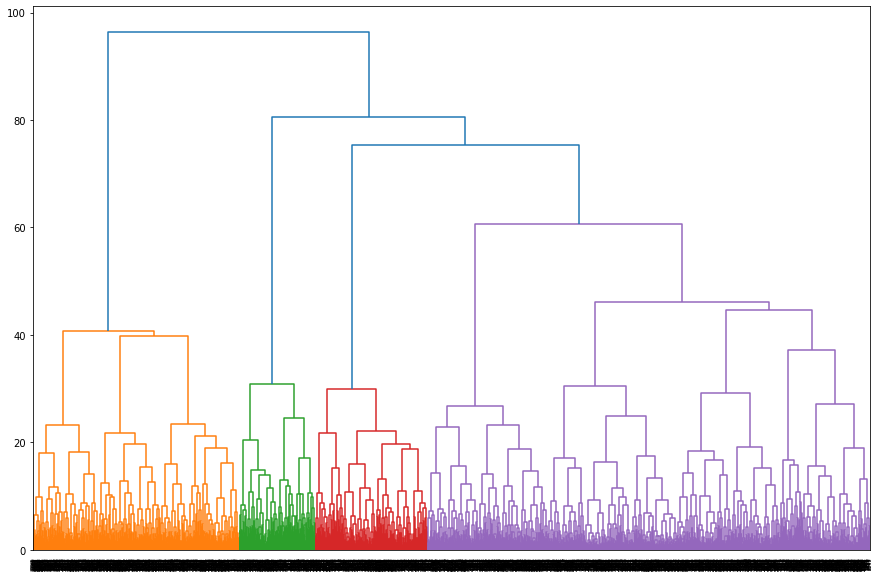

In [13]:
sc = StandardScaler()
X_sc = sc.fit_transform(X_train)

linked = linkage(X_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Now, let's train the clustering model using the K-means algorithm and predict customer clusters.

In [14]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(X_sc)
X_train['cluster_km'] = labels
X_train.groupby(['cluster_km']).mean()

/tmp/ipykernel_268/4275414928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['cluster_km'] = labels


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
cluster_km,,,,,,,,,,,,,
0,0.486936,0.000000,0.458432,0.071259,0.919240,2.285036,0.216152,28.520190,135.787937,2.156770,2.847981,1.702299,1.513329
1,0.474725,1.000000,0.226374,0.008791,0.909890,1.984615,0.318681,28.117582,129.820268,1.897802,2.420879,1.307462,1.065191
2,0.511873,0.948549,0.750660,0.498681,0.907652,11.817942,0.572559,29.874670,165.489580,10.781003,4.758575,1.978241,1.969751
3,0.463855,1.000000,0.797189,1.000000,0.919679,2.997992,0.439759,28.961847,141.095120,2.819277,3.275100,1.650995,1.513595
4,0.600326,0.975530,0.301794,0.145188,0.893964,2.962480,0.495922,30.239804,163.235696,2.698206,5.384992,2.922203,2.924973


Interesting Findings:

Gender:
- Assuming 0 represents males and 1 represents females.
- The results indicate that, on average, females are more likely to attend the gym across all clusters.


Near_location:

- On average, most clusters have customers living close to the gym. Only cluster 2 has customers who live farther away, with cluster 3 having a value close to 1.


Partner & Promo Friends:

- A significant number in cluster 4 participates, and when considering gender, this cluster mostly consists of males. Perhaps males are more likely to invite friends.


Contract & Additional Charge:

- Notably, cluster 2 generates the highest gym revenue, likely due to having the longest contract duration.


/tmp/ipykernel_268/3531257431.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['cluster_km'] = labels_new
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


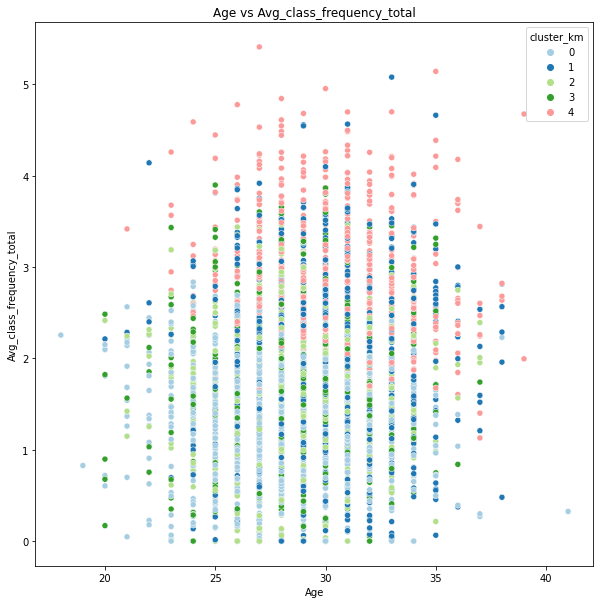

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


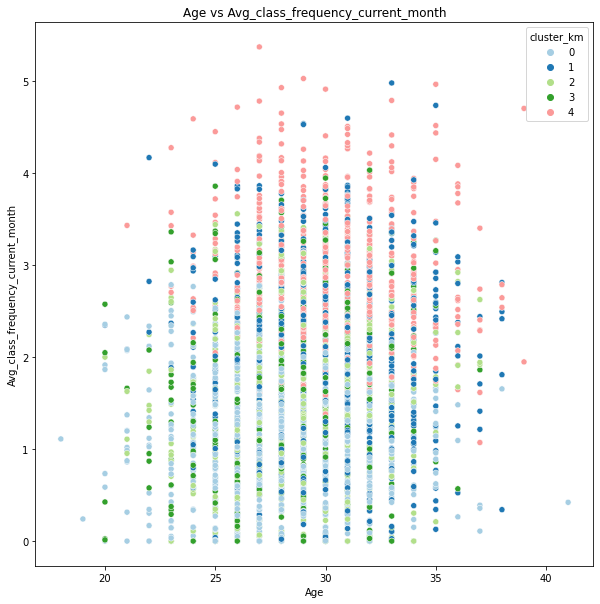

In [15]:
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],hue = df[cluster_name], palette = 'Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

sc_new = StandardScaler()
x_sc_new = sc.fit_transform(X_train)
km_new = KMeans(n_clusters = 5)
labels_new = km.fit_predict(x_sc_new)
X_train['cluster_km'] = labels_new
X_train.groupby(['cluster_km']).mean()

show_clusters_on_plot(X_train, 'Age','Avg_class_frequency_total', 'cluster_km') 
show_clusters_on_plot(X_train, 'Age','Avg_class_frequency_current_month', 'cluster_km') 


Examining the trends with age on the X-axis against Avg_class_frequency_total and Avg_class_frequency_current_month, clusters 1, 2, and 3 are the most frequent, especially in the age range of 25 to 35. These clusters visit the gym the most per week. To retain customers, these clusters should be further examined.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


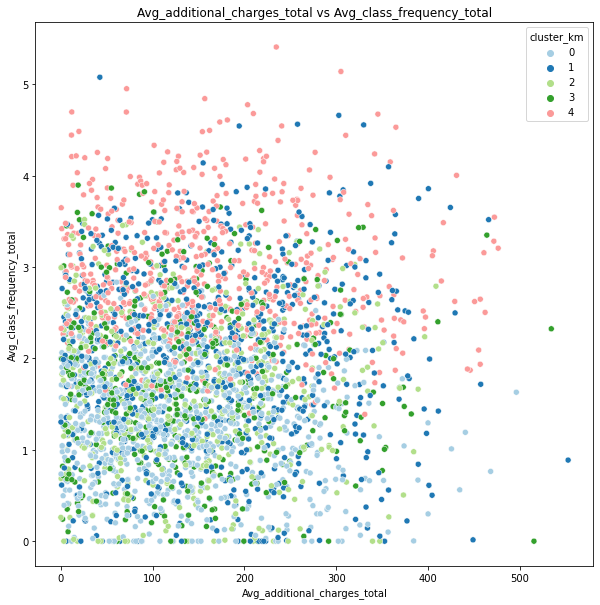

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


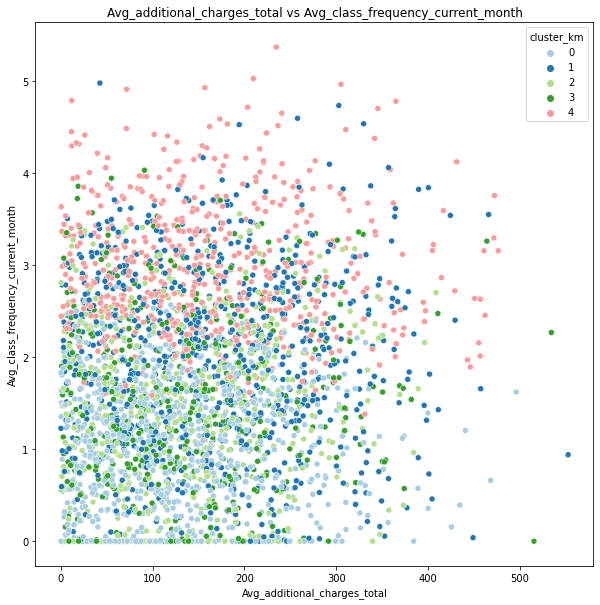

In [16]:
show_clusters_on_plot(X_train, 'Avg_additional_charges_total','Avg_class_frequency_total', 'cluster_km') 
show_clusters_on_plot(X_train, 'Avg_additional_charges_total','Avg_class_frequency_current_month', 'cluster_km') 

Analyzing Avg_additional_charges_total against Age, Avg_class_frequency_total, and Avg_class_frequency_current_month reveals that clusters 1, 2, and 3 make more additional service purchases, especially in the age range of 25 to 35. The relationship with avg_additional_charges_total and avg_class_frequency_total and avg_class_frequency_current_month shows a fairly even distribution.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


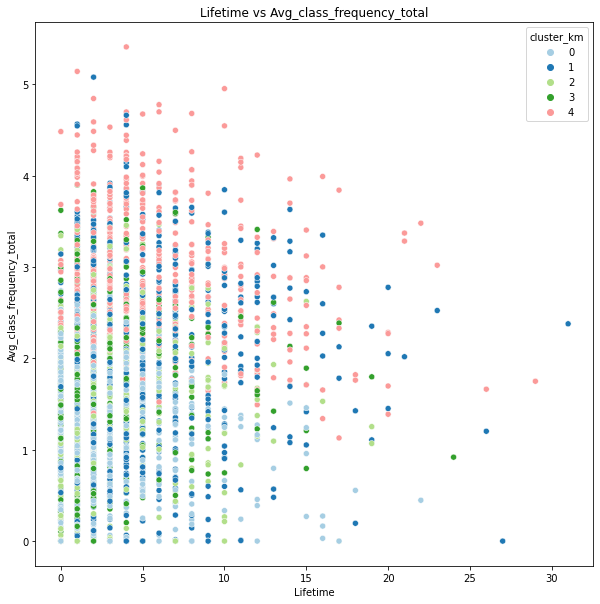

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


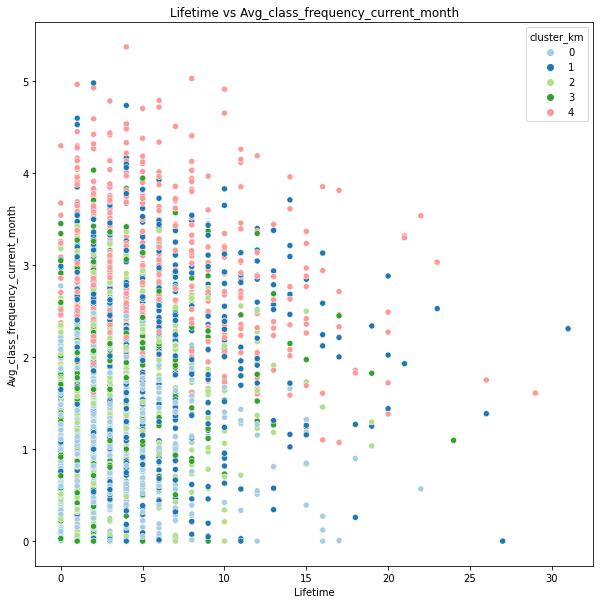

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


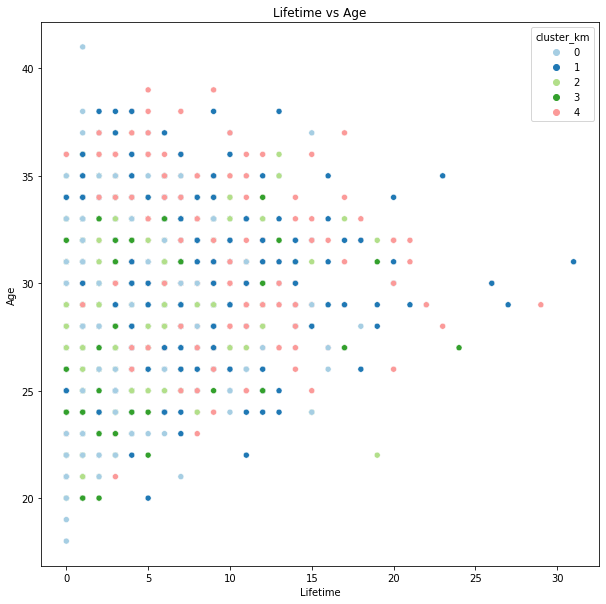

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


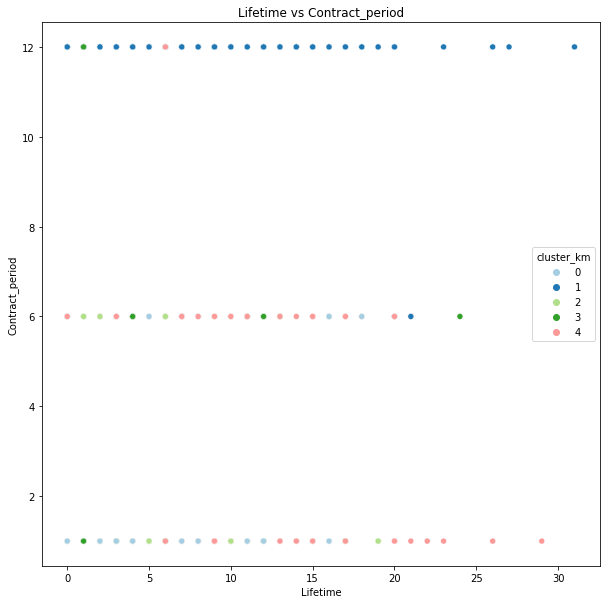

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


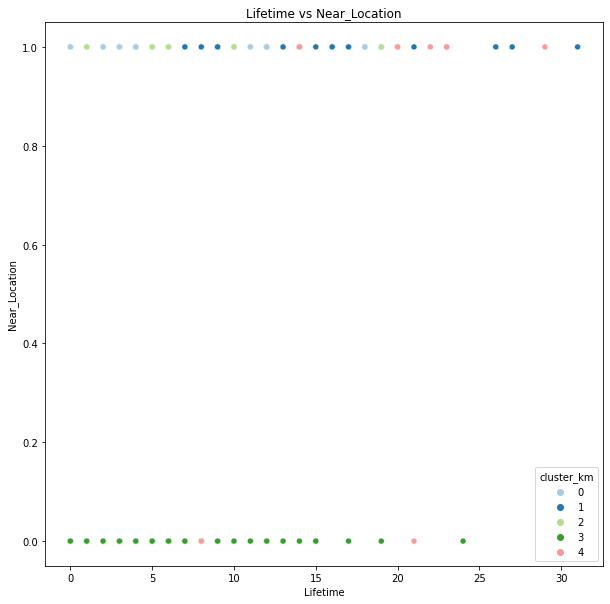

In [17]:
show_clusters_on_plot(X_train, 'Lifetime','Avg_class_frequency_total', 'cluster_km') 
show_clusters_on_plot(X_train, 'Lifetime','Avg_class_frequency_current_month', 'cluster_km') 
show_clusters_on_plot(X_train, 'Lifetime','Age', 'cluster_km') 
show_clusters_on_plot(X_train, 'Lifetime','Contract_period', 'cluster_km')
show_clusters_on_plot(X_train, 'Lifetime','Near_Location', 'cluster_km')

When looking at Lifetime against Age, Avg_class_frequency_total, Avg_class_frequency_current_month, contract_period, and near_location, the lifetime effect on avg_class_frequency_total and Avg_class_frequency_current_month with a longer lifetime tends to belong to clusters 2 and 1. For age, the range of 25 to 35 has a higher lifetime. The contract period in cluster 2 has a relatively wide range of lifetimes, but clusters 1 and 2 can be chosen as options.

In [18]:
print('Silhouette_score: {:.2f}'.format(silhouette_score(x_sc_new, labels)))

Silhouette_score: 0.17


The clustering results are somewhat low, approaching 0. Further discussion with experts and additional evaluation is needed. However, testing can already be conducted based on the distribution process.

In [19]:
df_tmp = X_train.copy()
df_tmp["churn"] = y_train

In [20]:
df_tmp[['cluster_km','churn']]

,cluster_km,churn
1161,1,0
2355,4,0
1831,1,0
156,2,0
195,0,0
...,...,...
835,3,0
3264,1,0
1653,0,0
2607,0,1


In [21]:
df_cross = pd.crosstab(df_tmp["cluster_km"], df_tmp['churn'], dropna=False)
df_cross['Total'] = df_cross.sum(axis = 1)
df_cross = df_cross.reset_index()
df_cross

churn,cluster_km,0,1,Total
0,0,431,479,910
1,1,739,19,758
2,2,355,143,498
3,3,233,188,421
4,4,579,34,613


In [22]:
df_cross['churn_rate'] = df_cross[1]*100 / df_cross['Total']
df_cross

churn,cluster_km,0,1,Total,churn_rate
0,0,431,479,910,52.637363
1,1,739,19,758,2.506596
2,2,355,143,498,28.714859
3,3,233,188,421,44.655582
4,4,579,34,613,5.546493


From the data above, it can be seen that clusters 2 and 4 are more likely to leave the gym, with percentages of 43% and 52%, respectively.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


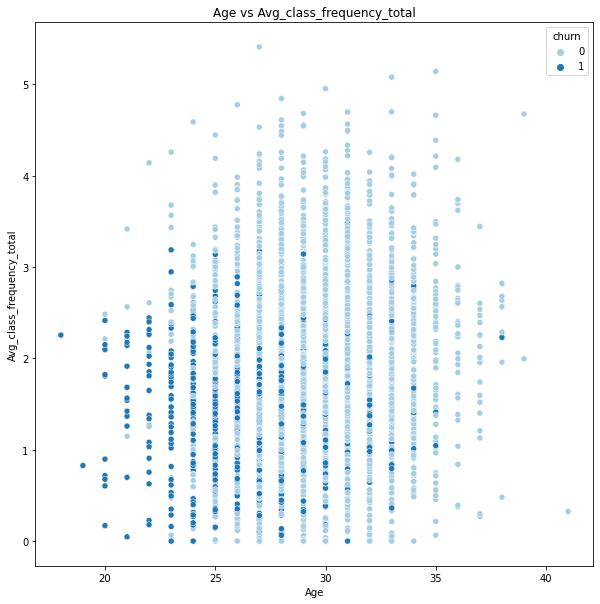

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


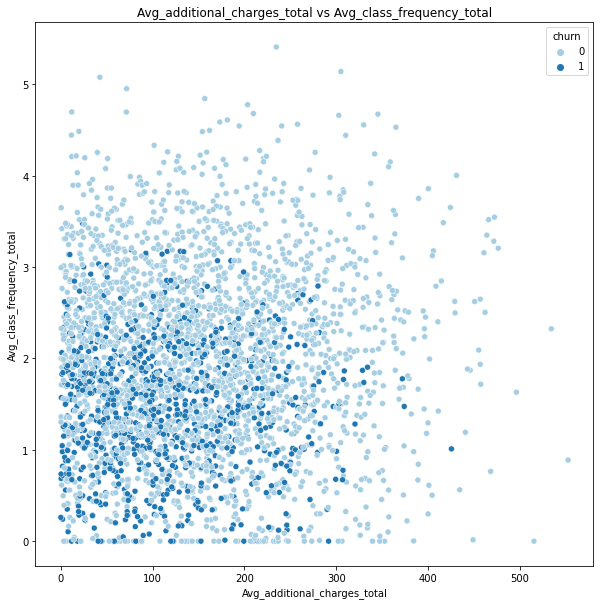

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


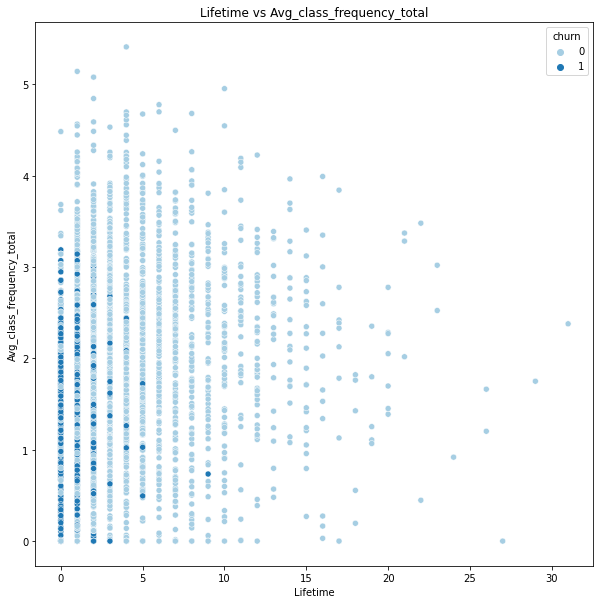

In [23]:
show_clusters_on_plot(df_tmp,'Age','Avg_class_frequency_total', 'churn')
show_clusters_on_plot(df_tmp,'Avg_additional_charges_total','Avg_class_frequency_total', 'churn')
show_clusters_on_plot(df_tmp, 'Lifetime','Avg_class_frequency_total', 'churn')

## Formulating Conclusions and Simple Recommendations for Working with Customers

Conclusion from the obtained data:

From the structure of the data composition, the data obtained initially appears to be good because there are no missing data or data type issues.

Among the provided features, some interesting features stand out, and we can delve deeper into their information, namely, contract period, age, weekly attendance, and lifetime.

Because the above features strongly influence retention strategies, the conclusion is to target customers aged 25 to 35. Provide attractive promotions for the long term and adequate facilities for this age group. Focus on clusters 0, 1, and 3 as they yield the lowest churn rates.